# モジュールのロード

In [1]:
!pip install -U tensorflow-addons

     |████████████████████████████████| 679 kB 8.0 MB/s 


In [2]:
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np

# データのロード

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255
x_test = x_test / 255
y_train = tf.one_hot(y_train.reshape(len(y_train)), depth=10)
y_test = tf.one_hot(y_test.reshape(len(y_test)), depth=10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [4]:
index2label = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

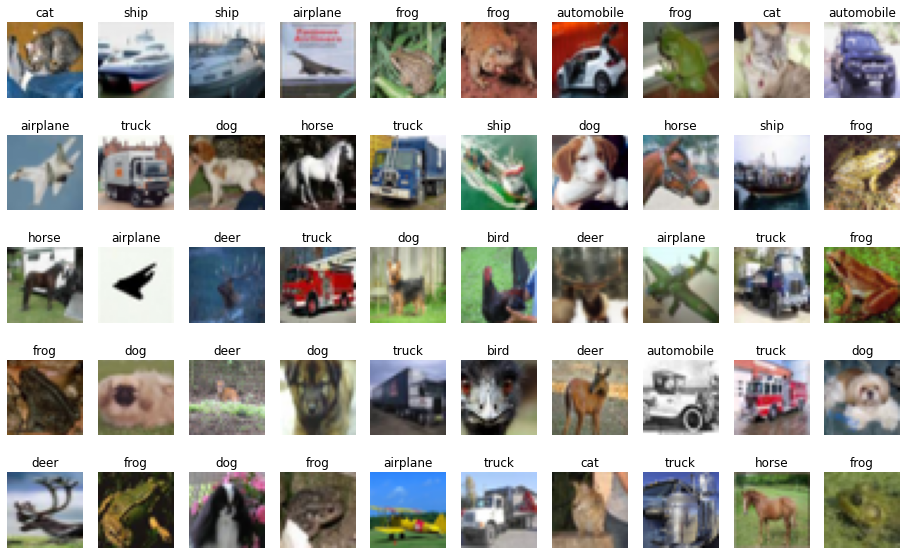

In [5]:
import matplotlib.pyplot as plt
import random

index = 0
count = 50

plt.figure(figsize=(16, 10))

for i, img in enumerate(x_test[index:index+count]):
    plt.subplot(5, 10, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(index2label[np.argmax(y_test[i])])

plt.show()

# ベースモデルでの実行(正規化レイヤーなし)

In [6]:
epochs = 5
batch_size = 256

In [7]:
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [8]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3686912   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 3,702,186
Trainable params: 3,702,186
Non-trainable params: 0
______________________________________________

In [9]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 35s 16ms/step - loss: 1.5726 - acc: 0.4391 - val_loss: 1.2628 - val_acc: 0.5475
Epoch 2/5
196/196 [==============================] - 3s 14ms/step - loss: 1.1270 - acc: 0.6027 - val_loss: 1.0988 - val_acc: 0.6071
Epoch 3/5
196/196 [==============================] - 3s 14ms/step - loss: 0.9689 - acc: 0.6617 - val_loss: 1.0568 - val_acc: 0.6311
Epoch 4/5
196/196 [==============================] - 3s 14ms/step - loss: 0.8480 - acc: 0.7053 - val_loss: 0.9952 - val_acc: 0.6584
Epoch 5/5
196/196 [==============================] - 3s 14ms/step - loss: 0.7548 - acc: 0.7383 - val_loss: 0.9629 - val_acc: 0.6643


# 正規化レイヤーあり

## Batch正規化

1層目のCNNの後にBatch正規化を適用した場合の例です。

In [10]:
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [11]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               3686912   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [12]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 4s 17ms/step - loss: 1.7273 - acc: 0.4333 - val_loss: 1.9351 - val_acc: 0.4620
Epoch 2/5
196/196 [==============================] - 3s 16ms/step - loss: 1.0899 - acc: 0.6150 - val_loss: 1.4119 - val_acc: 0.5789
Epoch 3/5
196/196 [==============================] - 3s 15ms/step - loss: 0.8913 - acc: 0.6902 - val_loss: 1.0592 - val_acc: 0.6360
Epoch 4/5
196/196 [==============================] - 3s 16ms/step - loss: 0.7735 - acc: 0.7319 - val_loss: 0.9189 - val_acc: 0.6813
Epoch 5/5
196/196 [==============================] - 3s 16ms/step - loss: 0.6672 - acc: 0.7695 - val_loss: 0.9679 - val_acc: 0.6718


## Layer正規化

1層目のCNNの後にLayer正規化を適用した場合の例です。

In [13]:
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.LayerNormalization(),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [14]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
layer_normalization (LayerNo (None, 32, 32, 32)        64        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               3686912   
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [15]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 7s 36ms/step - loss: 1.5485 - acc: 0.4651 - val_loss: 1.2358 - val_acc: 0.5588
Epoch 2/5
196/196 [==============================] - 7s 34ms/step - loss: 1.0172 - acc: 0.6417 - val_loss: 1.0196 - val_acc: 0.6432
Epoch 3/5
196/196 [==============================] - 7s 35ms/step - loss: 0.7672 - acc: 0.7331 - val_loss: 0.9513 - val_acc: 0.6717
Epoch 4/5
196/196 [==============================] - 7s 35ms/step - loss: 0.5283 - acc: 0.8189 - val_loss: 0.9971 - val_acc: 0.6714
Epoch 5/5
196/196 [==============================] - 7s 35ms/step - loss: 0.3114 - acc: 0.8971 - val_loss: 1.1332 - val_acc: 0.6731


## Instance正規化

1層目のCNNの後にInstance正規化を適用した場合の例です。

In [16]:
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tfa.layers.InstanceNormalization(),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [17]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
instance_normalization (Inst (None, 32, 32, 32)        64        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               3686912   
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [18]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 5s 22ms/step - loss: 1.7062 - acc: 0.4344 - val_loss: 1.1861 - val_acc: 0.5660
Epoch 2/5
196/196 [==============================] - 4s 20ms/step - loss: 1.0368 - acc: 0.6369 - val_loss: 0.9780 - val_acc: 0.6491
Epoch 3/5
196/196 [==============================] - 4s 20ms/step - loss: 0.8692 - acc: 0.6982 - val_loss: 0.9214 - val_acc: 0.6777
Epoch 4/5
196/196 [==============================] - 4s 20ms/step - loss: 0.7557 - acc: 0.7386 - val_loss: 0.9322 - val_acc: 0.6756
Epoch 5/5
196/196 [==============================] - 4s 21ms/step - loss: 0.6531 - acc: 0.7747 - val_loss: 0.9052 - val_acc: 0.6943


# 各正規化手法の比較

Batch正規化、Layer正規化、Instance正規化をぞれぞれ適用した場合の比較です。

In [19]:
def create_model(input_shape, class_num, norm_layer):
    if norm_layer:
        model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
            norm_layer(),
            tf.keras.layers.Conv2D(32, 3, activation='relu'),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(class_num, activation='softmax'),
        ])
    else:
        model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
            tf.keras.layers.Conv2D(32, 3, activation='relu'),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(class_num, activation='softmax'),
        ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [20]:
epochs = 10
batch_size = 256

norm_layers = [
                None,
                tf.keras.layers.BatchNormalization,
                tf.keras.layers.LayerNormalization,
                tfa.layers.InstanceNormalization
]

tf.random.set_seed(0) # 再現性を高めるために乱数シードを固定しています。
histories = []
for norm_layer in norm_layers:
    model = create_model(x_train.shape, 10, norm_layer)

    history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)
    histories.append(history)

Epoch 1/10
196/196 [==============================] - 4s 16ms/step - loss: 1.5267 - acc: 0.4538 - val_loss: 1.2851 - val_acc: 0.5522
Epoch 2/10
196/196 [==============================] - 3s 15ms/step - loss: 1.1305 - acc: 0.6042 - val_loss: 1.0696 - val_acc: 0.6276
Epoch 3/10
196/196 [==============================] - 3s 14ms/step - loss: 0.9633 - acc: 0.6634 - val_loss: 1.0096 - val_acc: 0.6504
Epoch 4/10
196/196 [==============================] - 3s 14ms/step - loss: 0.8442 - acc: 0.7064 - val_loss: 0.9535 - val_acc: 0.6669
Epoch 5/10
196/196 [==============================] - 3s 14ms/step - loss: 0.7246 - acc: 0.7483 - val_loss: 0.9224 - val_acc: 0.6815
Epoch 6/10
196/196 [==============================] - 3s 14ms/step - loss: 0.6287 - acc: 0.7822 - val_loss: 0.9130 - val_acc: 0.6938
Epoch 7/10
196/196 [==============================] - 3s 14ms/step - loss: 0.5165 - acc: 0.8230 - val_loss: 0.9928 - val_acc: 0.6786
Epoch 8/10
196/196 [==============================] - 3s 14ms/step - 

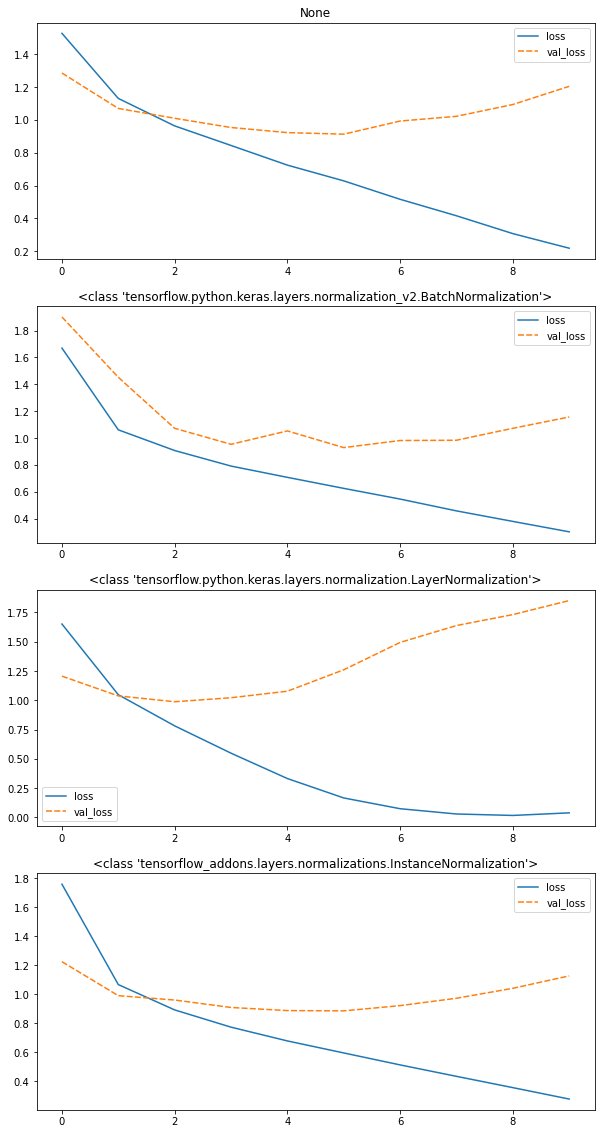

In [21]:
import pandas as pd
import seaborn as sns

fig = plt.figure(figsize=(10, 20))

for i, history in enumerate(histories):
    norm_layer_name = str(norm_layers[i])
    ax = fig.add_subplot(4, 1, i + 1)
    
    plot_df = pd.DataFrame(history.history)[['loss', 'val_loss']]
    sns.lineplot(data=plot_df, ax=ax)
    ax.set_title(norm_layer_name)